<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.907045,80.190856,75.773006,25.301387,5.229249,280.401544,277.739544,2.662000
1,0.0,1.0,62.756250,67.994734,53.030440,35.419556,-2.867423,226.333557,230.844602,-4.511045
2,0.0,2.0,79.868704,48.106452,66.078207,89.220215,1.738122,295.011700,292.933835,2.077866
3,0.0,3.0,78.246149,59.176019,39.504271,93.588794,-4.504283,276.010950,279.480910,-3.469960
4,0.0,4.0,60.373835,83.709720,37.804463,24.015733,-6.213779,209.689972,217.785866,-8.095894
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.303172,59.314785,21.321358,88.664001,2.184260,215.787575,212.589625,3.197950
29996,999.0,26.0,29.940325,55.621720,39.691793,64.790738,1.051342,201.095918,199.925167,1.170751
29997,999.0,27.0,89.910069,61.029243,75.442422,20.786654,5.047794,262.216181,259.382960,2.833222
29998,999.0,28.0,88.694087,81.458652,25.855380,22.879286,4.119783,233.007187,232.685243,0.321944


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.907045  80.190856  75.773006  25.301387  5.229249  280.401544   
      1.0    62.756250  67.994734  53.030440  35.419556 -2.867423  226.333557   
      2.0    79.868704  48.106452  66.078207  89.220215  1.738122  295.011700   
      3.0    78.246149  59.176019  39.504271  93.588794 -4.504283  276.010950   
      4.0    60.373835  83.709720  37.804463  24.015733 -6.213779  209.689972   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   34.303172  59.314785  21.321358  88.664001  2.184260  215.787575   
      26.0   29.940325  55.621720  39.691793  64.790738  1.051342  201.095918   
      27.0   89.910069  61.029243  75.442422  20.786654  5.047794  262.216181   
      28.0   88.694087  81.458652  25.855380  22.879286  4.119783  233.007187   
      29.0   22.357102  45.115032  64.032215  70.697062  1.321410  213.522821   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.739544  2.662000  
      1.0    230.844602 -4.511045  
      2.0    292.933835  2.077866  
      3.0    279.480910 -3.469960  
      4.0    217.785866 -8.095894  
...                 ...       ...  
999.0 25.0   212.589625  3.197950  
      26.0   199.925167  1.170751  
      27.0   259.382960  2.833222  
      28.0   232.685243  0.321944  
      29.0   210.965304  2.557517  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.907045  80.190856  75.773006  25.301387  5.229249  280.401544   
      1.0    62.756250  67.994734  53.030440  35.419556 -2.867423  226.333557   
      2.0    79.868704  48.106452  66.078207  89.220215  1.738122  295.011700   
      3.0    78.246149  59.176019  39.504271  93.588794 -4.504283  276.010950   
      4.0    60.373835  83.709720  37.804463  24.015733 -6.213779  209.689972   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   34.303172  59.314785  21.321358  88.664001  2.184260  215.787575   
      26.0   29.940325  55.621720  39.691793  64.790738  1.051342  201.095918   
      27.0   89.910069  61.029243  75.442422  20.786654  5.047794  262.216181   
      28.0   88.694087  81.458652  25.855380  22.879286  4.119783  233.007187   
      29.0   22.357102  45.115032  64.032215  70.697062  1.321410  213.522821   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.739544  2.662000  
      1.0    230.844602 -4.511045  
      2.0    292.933835  2.077866  
      3.0    279.480910 -3.469960  
      4.0    217.785866 -8.095894  
...                 ...       ...  
999.0 25.0   212.589625  3.197950  
      26.0   199.925167  1.170751  
      27.0   259.382960  2.833222  
      28.0   232.685243  0.321944  
      29.0   210.965304  2.557517  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.907045,80.190856,75.773006,25.301387,5.229249,280.401544,277.739544,2.662000
1,0.0,1.0,62.756250,67.994734,53.030440,35.419556,-2.867423,226.333557,230.844602,-4.511045
2,0.0,2.0,79.868704,48.106452,66.078207,89.220215,1.738122,295.011700,292.933835,2.077866
3,0.0,3.0,78.246149,59.176019,39.504271,93.588794,-4.504283,276.010950,279.480910,-3.469960
4,0.0,4.0,60.373835,83.709720,37.804463,24.015733,-6.213779,209.689972,217.785866,-8.095894
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.303172,59.314785,21.321358,88.664001,2.184260,215.787575,212.589625,3.197950
29996,999.0,26.0,29.940325,55.621720,39.691793,64.790738,1.051342,201.095918,199.925167,1.170751
29997,999.0,27.0,89.910069,61.029243,75.442422,20.786654,5.047794,262.216181,259.382960,2.833222
29998,999.0,28.0,88.694087,81.458652,25.855380,22.879286,4.119783,233.007187,232.685243,0.321944


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.907045  80.190856  75.773006  25.301387  5.229249  280.401544   
      1.0    62.756250  67.994734  53.030440  35.419556 -2.867423  226.333557   
      2.0    79.868704  48.106452  66.078207  89.220215  1.738122  295.011700   
      3.0    78.246149  59.176019  39.504271  93.588794 -4.504283  276.010950   
      4.0    60.373835  83.709720  37.804463  24.015733 -6.213779  209.689972   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   34.303172  59.314785  21.321358  88.664001  2.184260  215.787575   
      26.0   29.940325  55.621720  39.691793  64.790738  1.051342  201.095918   
      27.0   89.910069  61.029243  75.442422  20.786654  5.047794  262.216181   
      28.0   88.694087  81.458652  25.855380  22.879286  4.119783  233.007187   
      29.0   22.357102  45.115032  64.032215  70.697062  1.321410  213.522821   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.739544  2.662000  
      1.0    230.844602 -4.511045  
      2.0    292.933835  2.077866  
      3.0    279.480910 -3.469960  
      4.0    217.785866 -8.095894  
...                 ...       ...  
999.0 25.0   212.589625  3.197950  
      26.0   199.925167  1.170751  
      27.0   259.382960  2.833222  
      28.0   232.685243  0.321944  
      29.0   210.965304  2.557517  

[30000 rows x 8 columns]

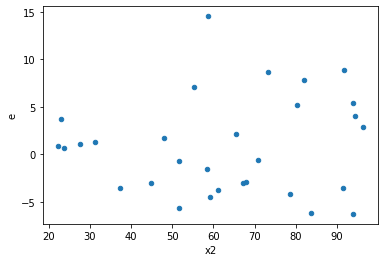

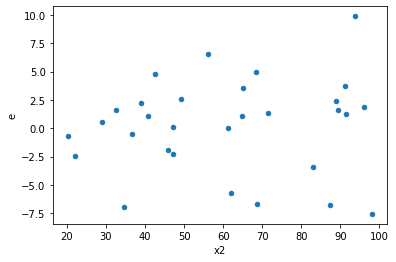

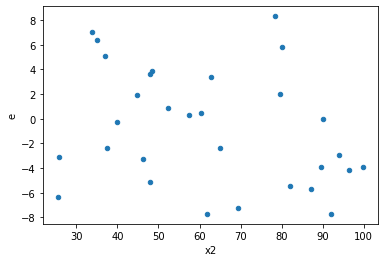

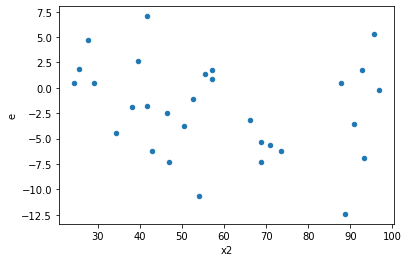

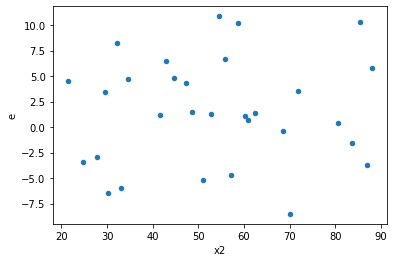

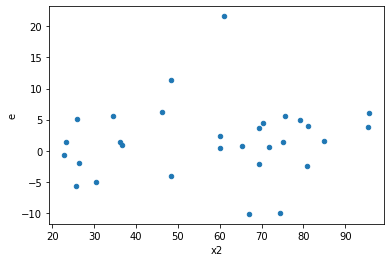

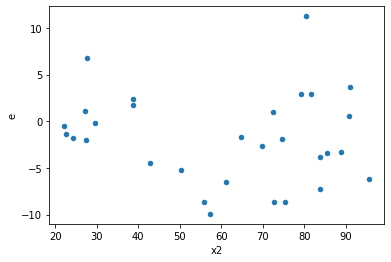

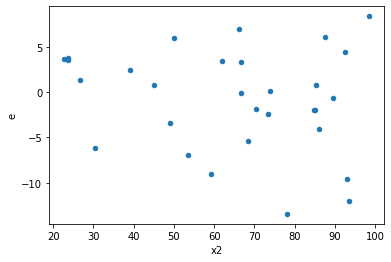

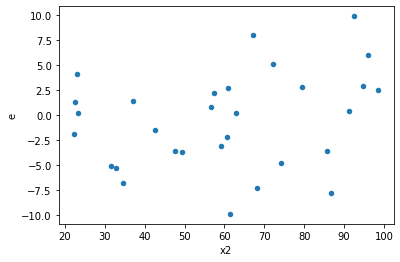

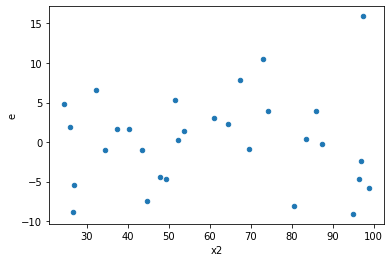

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,16.0,3912.571572583095,8898.932565460414,391.2571572583095,556.1832853412759,1.4215287184486736,0.5118260641823493,0.7440869679088253,0.25591303209117466,Reject001=1 : Homoscedasticity
5.0,20.0,6.0,6895.581483478351,3413.2928098692837,344.7790741739176,568.8821349782139,1.6499903201528163,0.5549604892187578,0.7225197553906211,0.2774802446093789,Reject001=1 : Homoscedasticity
7.0,14.0,12.0,3895.1690518831783,5814.833242323307,278.22636084879844,484.5694368602756,1.7416374040977873,0.34153969294368913,0.8292301535281554,0.17076984647184457,Reject001=1 : Homoscedasticity
8.0,10.0,16.0,4880.852714118138,9599.646626000478,488.0852714118138,599.9779141250299,1.229248144262908,0.6878014935149073,0.6560992532425464,0.34390074675745363,Reject001=1 : Homoscedasticity
9.0,14.0,12.0,3627.428013263011,8499.548426507059,259.1020009473579,708.2957022089216,2.733655856068927,0.08848694085763475,0.9557565295711826,0.04424347042881738,Reject001=1 : Homoscedasticity
10.0,17.0,9.0,10747.894090441769,6142.347212672438,632.2290641436334,682.483023630271,1.0794869491719865,0.9460760401781743,0.5269619799109129,0.47303802008908713,Reject001=1 : Homoscedasticity
15.0,15.0,11.0,6383.778082363805,8716.447236648457,425.5852054909203,792.4042942407688,1.8619169182037612,0.3019296538168077,0.8490351730915962,0.15096482690840385,Reject001=1 : Homoscedasticity
17.0,13.0,13.0,7824.441366075124,13668.546523255285,601.8801050827019,1051.426655635022,1.7469038214688117,0.3269027035883063,0.8365486482058468,0.16345135179415315,Reject001=1 : Homoscedasticity
18.0,12.0,14.0,8975.988672416788,10918.910089927645,747.9990560347323,779.9221492805461,1.042677986005816,0.9297679707151585,0.5351160146424208,0.46488398535757924,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,16.0,3912.571572583095,8898.932565460414,391.2571572583095,556.1832853412759,1.4215287184486736,0.5118260641823493,Reject001=1 : Homoscedasticity
1.0,18.0,8.0,12382.760543820219,4369.286910757956,687.9311413233455,546.1608638447445,0.7939179243930095,0.6459900376028592,Reject001=1 : Homoscedasticity
2.0,10.0,16.0,6999.235142685019,2715.416828312887,699.9235142685019,169.71355176955544,0.24247442514761777,0.027992872249092852,Reject001=1 : Homoscedasticity
3.0,22.0,4.0,10669.629103909103,2147.322752957215,484.9831410867774,536.8306882393038,1.1069058751946377,0.9579786291712427,Reject001=1 : Homoscedasticity
4.0,16.0,10.0,8552.101630762581,2695.0598283140025,534.5063519226613,269.5059828314003,0.5042147429342347,0.21418602698390737,Reject001=1 : Homoscedasticity
5.0,20.0,6.0,6895.581483478351,3413.2928098692837,344.7790741739176,568.8821349782139,1.6499903201528163,0.5549604892187578,Reject001=1 : Homoscedasticity
6.0,13.0,13.0,5559.4251055370705,2797.970092399238,427.6480850413131,215.22846864609525,0.5032840697165826,0.22903626895134407,Reject001=1 : Homoscedasticity
7.0,14.0,12.0,3895.1690518831783,5814.833242323307,278.22636084879844,484.5694368602756,1.7416374040977873,0.34153969294368913,Reject001=1 : Homoscedasticity
8.0,10.0,16.0,4880.852714118138,9599.646626000478,488.0852714118138,599.9779141250299,1.229248144262908,0.6878014935149073,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      975
Reject001=0 : Heteroscedasticity     25
Name: Result_test, dtype: int64